General Instructions
=====================

Use scipy.stats.norm.cdf and scipy.stats.norm.ppf where required


In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.stats import t
from scipy import stats
from scipy.stats import norm

# Question # 1
You want to rent an unfurnished one-bedroom apartment in Karachi. The mean monthly rent for a random sample of 60 apartments advertised on Zameen.com list is 1000 dollars. Assume sample standard deviation of 200 dollars. Construct  
1. 85% confidence interval.
2. 90% confidence interval.
3. 95% confidence interval.

How does confidence intervals change as we move from (85% to 95%)? (Write your answer in plain english)

Hints
====

1.Formula to find confidence intervals

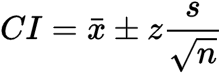

2. To find the Z value(for 95% confidence interval) you can use Python (scipy.stats.norm.ppf)


In [3]:
mean = 1000
standard_deviation = 200
n = 60

confidence_interval_85 = (mean - norm.ppf(0.85) * (standard_deviation / np.sqrt(n)), mean + norm.ppf(0.85) * (standard_deviation / np.sqrt(n)))
confidence_interval_90 = (mean - norm.ppf(0.90) * (standard_deviation / np.sqrt(n)), mean + norm.ppf(0.90) * (standard_deviation / np.sqrt(n)))
confidence_interval_95 = (mean - norm.ppf(0.95) * (standard_deviation / np.sqrt(n)), mean + norm.ppf(0.95) * (standard_deviation / np.sqrt(n)))

print("85% Confidence Interval:", confidence_interval_85)
print("90% Confidence Interval:", confidence_interval_90)
print("95% Confidence Interval:", confidence_interval_95)

85% Confidence Interval: (973.2394049535817, 1026.7605950464183)
90% Confidence Interval: (966.9104808622648, 1033.0895191377351)
95% Confidence Interval: (957.5300619724538, 1042.469938027546)


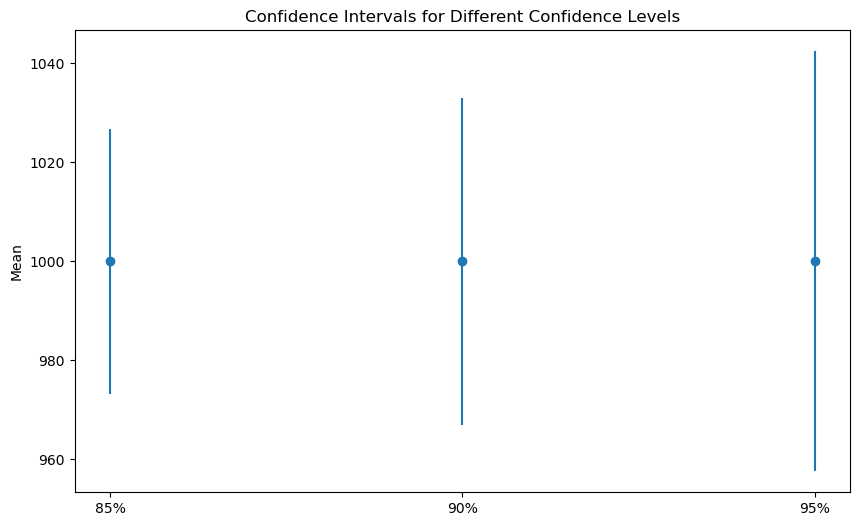

In [9]:
z_scores = [norm.ppf(0.85), norm.ppf(0.90), norm.ppf(0.95)]
conf_intervals = [(mean - z * (standard_deviation / np.sqrt(n)), mean + z * (standard_deviation / np.sqrt(n))) for z in z_scores]

plt.figure(figsize=(10, 6))
plt.errorbar([1, 2, 3], [mean] * 3, yerr=[[mean - interval[0] for interval in conf_intervals], [interval[1] - mean for interval in conf_intervals]], fmt='o')
plt.xticks([1, 2, 3], ['85%', '90%', '95%'])
plt.ylabel('Mean')
plt.title('Confidence Intervals for Different Confidence Levels')
plt.show()

#Question # 2
=============

Suppose you are working as a Data Scientist at Bykea. It is known historically that the average Customer Lifetime Value (CLV) is Rs 22 with a standard deviation of 4. You took a random sample of 40 customers and found out the average CLV to be Rs 23. Is there enough evidence to conclude that the average CLV of the population has changed?

Hint
====
Use t test
fro scipy.stats import t
1. t.cdf()
2. t.ppf()


Focus on the word "changed" is it a one sided or two sided test?

In [14]:
Population_Mean = 22
Population_Std = 4
Sample_Size = 40
Sample_Mean = 23

Standard_Error = Population_Std / np.sqrt(Sample_Size)

t_stat = (Sample_Mean - Population_Mean) / Standard_Error
df = Sample_Size - 1
p_value = 2 * (1 - t.cdf(abs(t_stat), df))

Significance_Level = 0.05

# Null hypothesis: The average Customer Lifetime Value (CLV) of the population has not changed
# Alternative hypothesis: The average CLV of the population has changed

if p_value >= Significance_Level:
    print("Fail to reject the null hypothesis: There is no convincing evidence to conclude that the average CLV of the population has changed.")
else:
    print("Reject the null hypothesis: There is enough evidence to conclude that the average CLV of the population has changed.")


Fail to reject the null hypothesis: There is no convincing evidence to conclude that the average CLV of the population has changed.


#Question # 3
===============



Suppose you are work as a freelance Data Scientist. A client approach to you who has A B2B SAAS product (offering business intelligence solutuons to companies). He is of the view that the average CAC (Cost to acquire a customer) of his platform is 150 dollars. He gave you a data of 250 random customers with the mean of CAC = 145 and sample standard deviation of 35. Does the data provide covincing evidence to prove that average CAC of his platform is less than his claim? (use significance level = 0.05)


### Use t test

In [15]:
Mean_Cac_Sample = 145
sample_size = 250
MeanCacPopulation = 150
std_dev_sample = 35

significance_level = 0.05

# Null hypothesis: The average cost to acquire a customer of the platform is greater than or equal to $150
# Alternative hypothesis: The average cost to acquire a customer of the platform is less than $150

standard_error = std_dev_sample / np.sqrt(sample_size)

t_stat = (Mean_Cac_Sample - MeanCacPopulation) / standard_error

df = sample_size - 1

p_value = t.cdf(t_stat, df)

if p_value >= significance_level:
    print("Fail to reject null hypothesis: There is not enough evidence to conclude that the average cost to acquire a customer is less than $150.")
else:
    print("Reject null hypothesis: There is evidence to conclude that the average cost to acquire a customer is less than $150.")


Reject null hypothesis: There is evidence to conclude that the average cost to acquire a customer is less than $150.


# Question # 4
===============

A university claims that the average height of their students is 167 cm. You are given a sample of 300 students. Does the sample provide an evidence that the average height of the students is greater than 167 cm? Use signifcance level = 0.1

## Use t test

In [16]:
# The data is loaded for you here
# Don't change anything in this cell
df = pd.read_csv("https://raw.githubusercontent.com/usmanabbas7/karachi.ai/main/students.csv", nrows=300)

claimedMeanHeight = 167
sampleSize = 300
sampleMeanHeight = df['height'].mean()
sampleStdDev = df['height'].std()

significanceLevel = 0.1

# Null hypothesis: The average height of the students is less than or equal to 167 cm
# Alternative hypothesis: The average height of the students is greater than 167 cm

standardError = sampleStdDev / np.sqrt(sampleSize)

t_stat = (sampleMeanHeight - claimedMeanHeight) / standardError
df = sampleSize - 1

p_value = t.cdf(t_stat, df)

if p_value >= significanceLevel:
    print("Fail to reject the null hypothesis: There is not enough evidence that the average height of the students is greater than 167cm.")
else:
    print("Reject the null hypothesis: There is evidence that the average height of the students is greater than 167cm.")


Fail to reject the null hypothesis: There is not enough evidence that the average height of the students is greater than 167cm.
